# Rushing

The simulator is robust enough to simulate sending rushes to your opponent. This can be used to forecast future cash and eco in the case of planned rushes and also has applications with regards to rush-sizing. We offer two examples to the user that showcase this ability:
1. A typical Round 13 layered regen rainbow rush of death
2. A single pressure FZOMG on Round 22

In [1]:
import b2sim.engine as b2
import b2sim.analysis as dd

## More about Eco Sends

Normally, when setting the eco queue for a simulation, you usually indicate a list of sends and the time to use each send. However, when sending rushes, it is more intuitive to instead consider the amount of sets of a given send you want to send before switching to the next send. This is where the `max_send_amount` argument comes in.

If you set an eco send in the queue to have a `max_send_amount` and then do not designate a specific time for the next send, this will force the simulator to meet the `max_send_amount` on the current send before switching to the next one. Exploiting this syntax leads to code that is not only more succinct, but easier to understand.

## R13 Regen Rainbow Rush of Death

,Time,Type,Message
0,266.2,Eco,Change eco to Grouped Leads
1,266.3,Eco,Change eco to Grouped Rainbows
2,267.0,Eco,Change eco to Grouped Zebras
3,268.9,Eco,Change eco to Grouped Purples
4,271.2,Eco,Change eco to Zero
5,285.0,Round,Round 14 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,800.0,0,800.0,255.0,266.0,285.0


The current cash and eco are (2581.6000000000013,783.5000000000005)


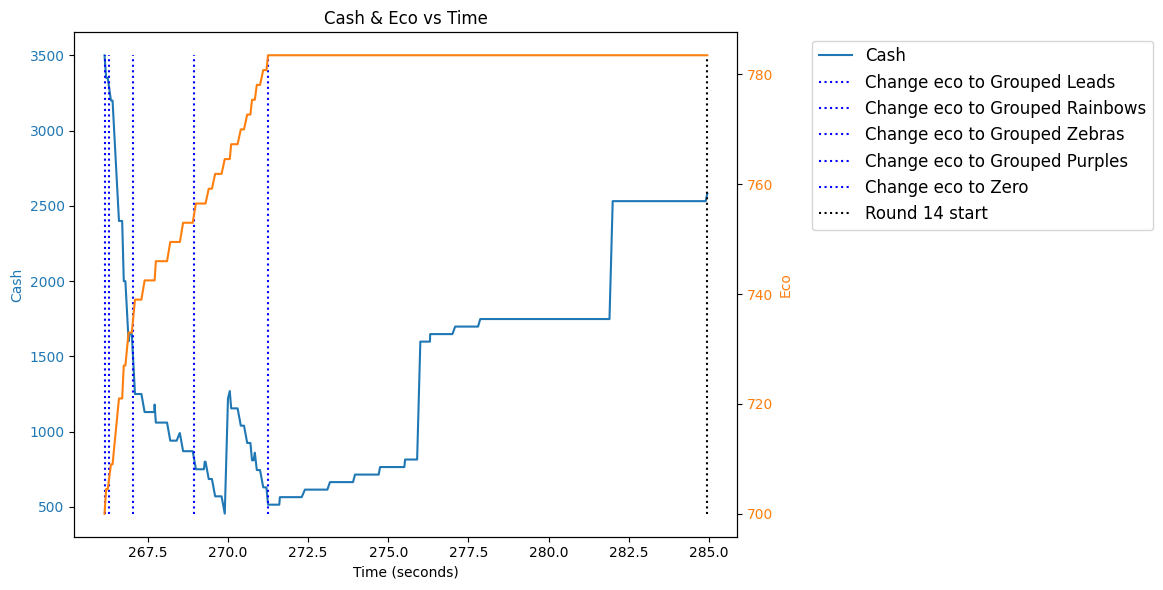

In [2]:
rounds = b2.Rounds(0.1)

farms = [
    b2.initFarm(rounds.getTimeFromRound(7), upgrades = [3,2,0])
]

eco_queue = [
    b2.ecoSend(send_name = 'Grouped Leads', max_send_amount = 2, time = rounds.getTimeFromRound(13)),
    b2.ecoSend(send_name = 'Grouped Rainbows', max_send_amount = 5, property='Regrow'),
    b2.ecoSend(send_name = 'Grouped Zebras', max_send_amount = 5),
    b2.ecoSend(send_name = 'Grouped Purples', max_send_amount = 10),
]

initial_state_game = {
    'Cash': 3500,
    'Eco': 700,
    'Eco Queue': eco_queue,
    'Rounds': rounds,
    'Farms': farms,
    'Game Round': 13
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 14)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'rrod_example')

## A Single FZOMG on R22

,Time,Type,Message
0,457.0,Eco,Change eco to Grouped Pinks
1,461.5,Eco,Change eco to Zero
2,473.5,Round,Round 22 start
3,473.5,Eco,Change eco to Spaced ZOMGs
4,473.5,Eco,Change eco to Grouped Pinks
5,503.8,Round,Round 23 start
6,516.3,Round,Round 24 start


,Revenue,Expenses,Profit,Eco Impact,Start Time,End Time
Farm Index,,,,,,
0,11250.0,0,11250.0,1137.0,457.0,516.0


The current cash and eco are (11798.400000000089,2323.20000000002)


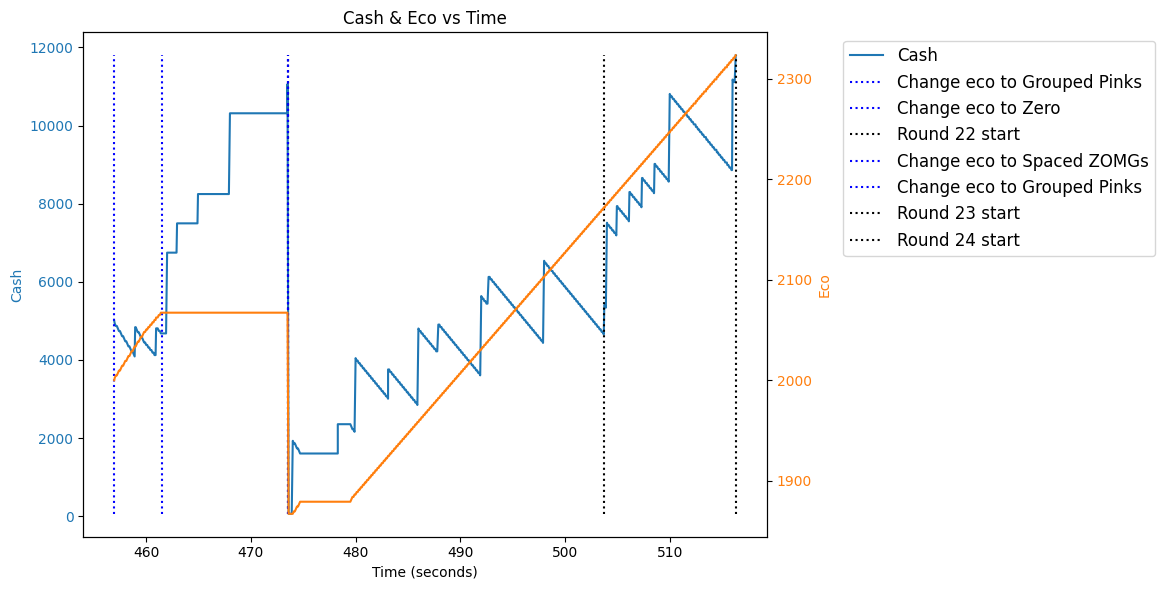

In [3]:
rounds = b2.Rounds(0.1)

farms = [
    b2.initFarm(rounds.getTimeFromRound(19.9), upgrades = [4,2,0])
]

eco_queue = [
    b2.ecoSend(send_name = 'Grouped Pinks', time = 0),
    b2.ecoSend(send_name = 'Zero', time = rounds.getTimeFromRound(22) - 12),
    b2.ecoSend(send_name = 'Spaced ZOMGs', max_send_amount = 1, time = rounds.getTimeFromRound(22), property='Fortified'),
    b2.ecoSend(send_name = 'Grouped Pinks'),
]

initial_state_game = {
    'Cash': 5000,
    'Eco': 2000,
    'Eco Queue': eco_queue,
    'Rounds': rounds,
    'Farms': farms,
    'Game Round': 21
}

game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 24)
dd.viewHistory(game_state)
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))
b2.writeLog(game_state.logs, filename = 'R22_FZOMG')